# 02 — Pandas for Data Analysis (Python for Chemical Engineers)

1. Introduction

Pandas is a data analysis and manipulation library.
It’s like Excel in Python — but faster, more flexible, and more powerful.

In [1]:
import pandas as pd
import numpy as np

2. Creating a DataFrame

In [2]:
# Example: Process plant daily production data
data = {
    'Date': pd.date_range(start='2025-01-01', periods=5, freq='D'),
    'Production (m³)': [120, 135, 128, 140, 150],
    'Energy Used (kWh)': [500, 520, 510, 530, 550]
}

df = pd.DataFrame(data)
df

,Date,Production (m³),Energy Used (kWh)
0,2025-01-01,120,500
1,2025-01-02,135,520
2,2025-01-03,128,510
3,2025-01-04,140,530
4,2025-01-05,150,550


3. Reading Data from a CSV

In [3]:
# Save to CSV
df.to_csv("plant_data.csv", index=False)

# Read from CSV
df_read = pd.read_csv("plant_data.csv")
df_read


,Date,Production (m³),Energy Used (kWh)
0,2025-01-01,120,500
1,2025-01-02,135,520
2,2025-01-03,128,510
3,2025-01-04,140,530
4,2025-01-05,150,550


4. Selecting Data

In [4]:
# Select a column
df['Production (m³)']

# Select multiple columns
df[['Date', 'Production (m³)']]

# Select rows by index
df.iloc[0]      # First row
df.iloc[0:3]    # First three rows

# Select rows by condition
df[df['Production (m³)'] > 130]


,Date,Production (m³),Energy Used (kWh)
1,2025-01-02,135,520
3,2025-01-04,140,530
4,2025-01-05,150,550


5. Basic Statistics

In [5]:
# Summary statistics
df.describe()

# Mean production
df['Production (m³)'].mean()

# Max energy used
df['Energy Used (kWh)'].max()


550

6. Adding New Columns

In [6]:
# Calculate production efficiency (m³/kWh)
df['Efficiency (m³/kWh)'] = df['Production (m³)'] / df['Energy Used (kWh)']
df


,Date,Production (m³),Energy Used (kWh),Efficiency (m³/kWh)
0,2025-01-01,120,500,0.240000
1,2025-01-02,135,520,0.259615
2,2025-01-03,128,510,0.250980
3,2025-01-04,140,530,0.264151
4,2025-01-05,150,550,0.272727


7. Handling Missing Data

In [7]:
# Introduce NaN
df.loc[2, 'Production (m³)'] = np.nan

# Check for missing values
df.isnull()

# Fill missing values with average
df['Production (m³)'].fillna(df['Production (m³)'].mean(), inplace=True)
df


C:\Users\desai\AppData\Local\Temp\ipykernel_4204\442857612.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production (m³)'].fillna(df['Production (m³)'].mean(), inplace=True)


,Date,Production (m³),Energy Used (kWh),Efficiency (m³/kWh)
0,2025-01-01,120.00,500,0.240000
1,2025-01-02,135.00,520,0.259615
2,2025-01-03,136.25,510,0.250980
3,2025-01-04,140.00,530,0.264151
4,2025-01-05,150.00,550,0.272727


8. Grouping and Aggregation

In [8]:
# Example: Assume a 'Shift' column
df['Shift'] = ['Morning', 'Evening', 'Morning', 'Evening', 'Morning']

# Group by Shift and get average production
df.groupby('Shift')['Production (m³)'].mean()


Shift
Evening    137.500000
Morning    135.416667
Name: Production (m³), dtype: float64

9. Merging DataFrames

In [9]:
# Example: Add maintenance data
maintenance = pd.DataFrame({
    'Date': pd.date_range(start='2025-01-01', periods=5, freq='D'),
    'Downtime (hrs)': [0, 1, 0.5, 0, 1.5]
})

# Merge with production data
df_merged = pd.merge(df, maintenance, on='Date')
df_merged


,Date,Production (m³),Energy Used (kWh),Efficiency (m³/kWh),Shift,Downtime (hrs)
0,2025-01-01,120.00,500,0.240000,Morning,0.0
1,2025-01-02,135.00,520,0.259615,Evening,1.0
2,2025-01-03,136.25,510,0.250980,Morning,0.5
3,2025-01-04,140.00,530,0.264151,Evening,0.0
4,2025-01-05,150.00,550,0.272727,Morning,1.5


10. Plotting with Pandas

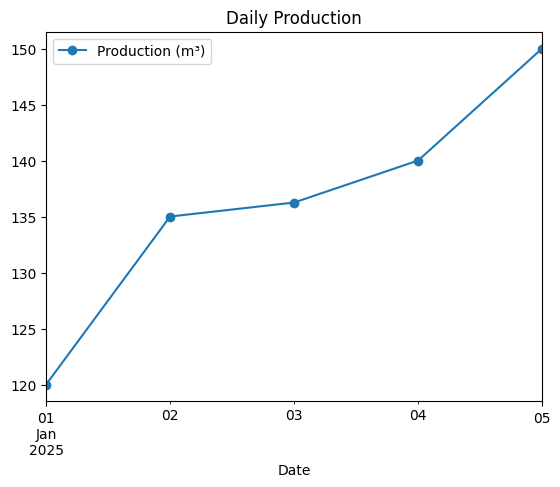

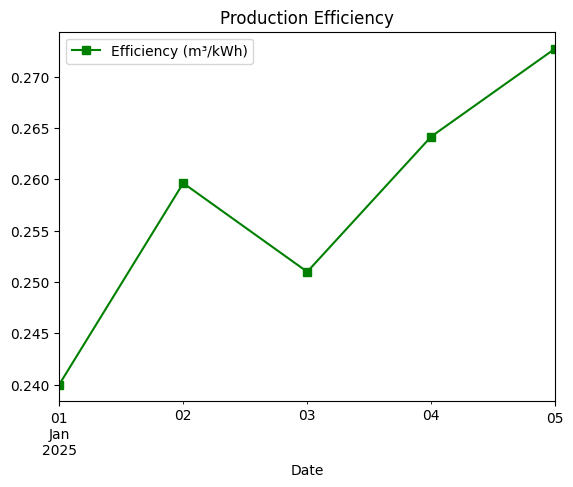

In [10]:
import matplotlib.pyplot as plt

# Production trend
df.plot(x='Date', y='Production (m³)', marker='o', title='Daily Production')
plt.show()

# Efficiency trend
df.plot(x='Date', y='Efficiency (m³/kWh)', marker='s', color='green', title='Production Efficiency')
plt.show()
